Домашнее задание 
===

Данные
----
Данные содержат информацию о продажах автомобилей в месяц. 

Задание
--
* Построить модель предсказаний, используя библиотеку Propeht. 
* Сделать предсказание на год вперед (12 месяцев)
* При постоении модели использовать кросс-валидацию

In [1]:

#dataset
import pandas as pd
df = pd.read_csv('../datatest/monthly-car-sales.csv')
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [3]:
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
sns.set_style("whitegrid")
import itertools
import matplotlib.dates as mdates

In [5]:
df.rename(columns = {'Month': 'ds',
                     'Sales': 'y'},
          inplace=True)

In [7]:
df.set_index(pd.to_datetime(df['ds']), inplace=True)

In [8]:
df.head()

,ds,y
ds,,
1960-01-01,1960-01,6550
1960-02-01,1960-02,8728
1960-03-01,1960-03,12026
1960-04-01,1960-04,14395
1960-05-01,1960-05,14587


In [29]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\miniforge3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\ProgramData\miniforge3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\ProgramData\miniforge3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


C:\Users\alibe\AppData\Local\Temp\ipykernel_16924\2519537036.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


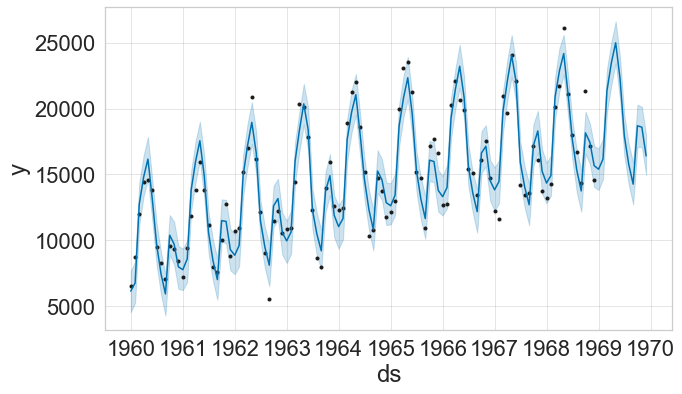

In [30]:
fig = m.plot(forecast)
fig.show()

C:\ProgramData\miniforge3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


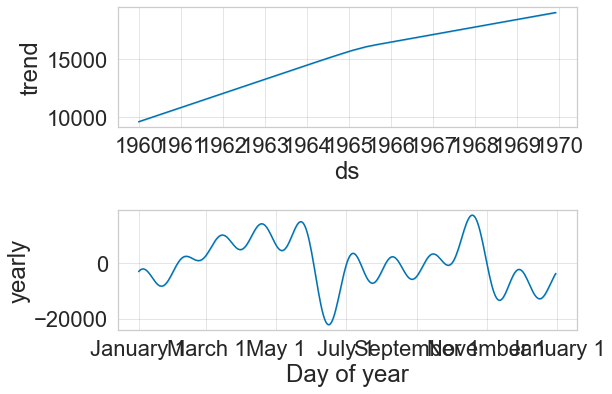

In [31]:
fig = m.plot_components(forecast)

In [32]:
df_cv = cross_validation(m, horizon='48MS', parallel='processes')

INFO:prophet:Making 96 forecasts with cutoffs between 1960-12-31 23:59:59.952000 and 1968-11-30 23:59:59.952000
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000279C5202040>


In [ ]:
# не смог победить разделение на мелкие периоды

In [33]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1961-01-01,27937.145495,27937.145482,27937.145508,7237,1960-12-31 23:59:59.952
1,1961-02-01,41716.327078,41435.095369,42020.166841,9374,1961-01-31 23:59:59.952
2,1961-03-01,14085.851963,14085.851954,14085.851972,11837,1961-02-28 23:59:59.952
3,1961-04-01,12399.331183,12399.331174,12399.331192,13784,1961-03-31 23:59:59.952
4,1961-05-01,15913.165780,15725.926613,16091.298396,15926,1961-04-30 23:59:59.952


In [34]:
cutoffs = df_cv.groupby('cutoff').mean().reset_index()['cutoff']

In [39]:
df_cv1 = df_cv[df_cv['cutoff']==df_cv['cutoff'].unique()]

In [40]:
df_cv1.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1961-01-01,27937.145495,27937.145482,27937.145508,7237,1960-12-31 23:59:59.952
1,1961-02-01,41716.327078,41435.095369,42020.166841,9374,1961-01-31 23:59:59.952
2,1961-03-01,14085.851963,14085.851954,14085.851972,11837,1961-02-28 23:59:59.952
3,1961-04-01,12399.331183,12399.331174,12399.331192,13784,1961-03-31 23:59:59.952
4,1961-05-01,15913.165780,15725.926613,16091.298396,15926,1961-04-30 23:59:59.952


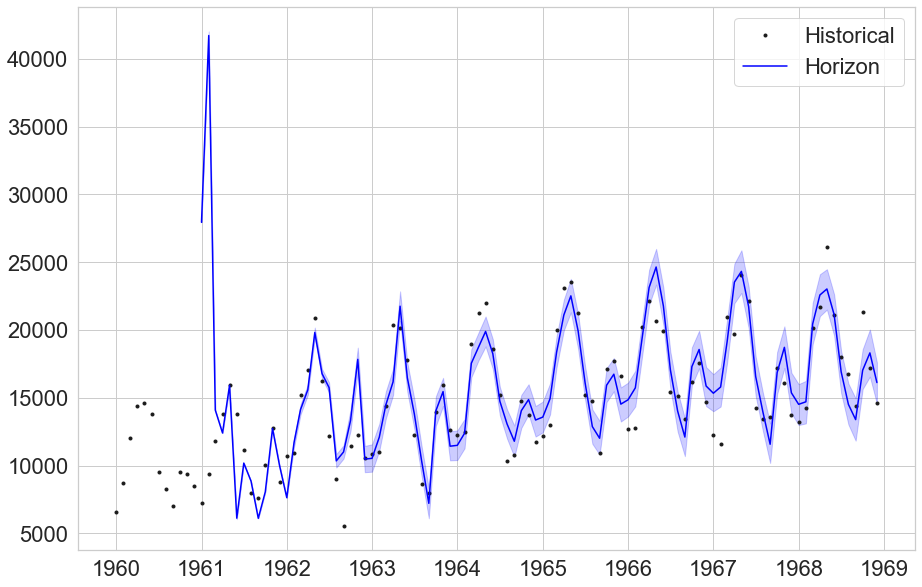

In [43]:
fig, ax = plt.subplots()

ax.plot(m.history['ds'], m.history['y'], 'k.', label = 'Historical')
ax.plot(df_cv1['ds'], df_cv1['yhat'], ls = '-', label = 'Horizon', color='blue')
ax.fill_between(df_cv1['ds'],
                df_cv1['yhat_lower'],
                df_cv1['yhat_upper'],
                color = 'blue',
                alpha = 0.2)

ax.legend()
plt.show()

In [44]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,0 days 00:00:00.048000,1.957562e+07,4424.433883,2128.152771,0.182035,0.092232,0.138194,0.40625
